검색어를 입력 하세요:  현대
몇 페이지까지 검색하실건가요:  4


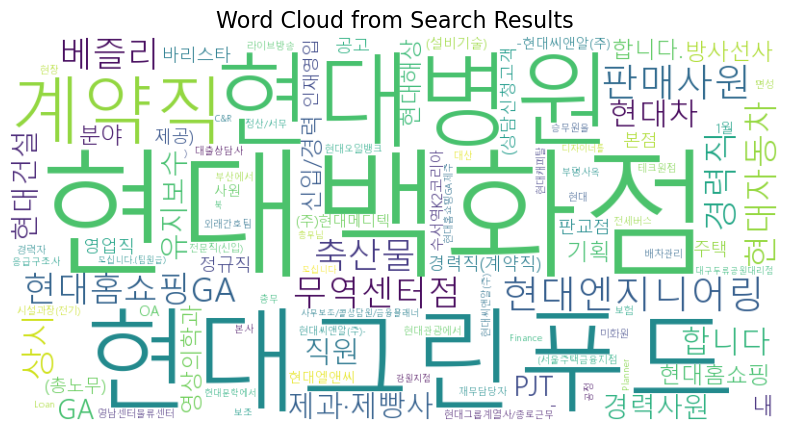

In [68]:
import matplotlib.pyplot as plt # plt는 시각화 도구 wordcloud 에서 사용
from wordcloud import WordCloud # wordcloud
from collections import Counter # 빈도 계산
import requests
from bs4 import BeautifulSoup

all_news = []
query = input("검색어를 입력 하세요: ")
number = int(input("몇 페이지까지 검색하실건가요: "))
#데이터 검색
for number in range(1, number+1):
    header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
    job_url = f"https://www.jobkorea.co.kr/Search/?stext=%{query}&Page_No={number}"
    job_raw = requests.get(job_url,headers=header)
    job_bs = BeautifulSoup(job_raw.text, "html.parser")
    job_section = job_bs.find("article", {"class": "list"})
    if job_section:
        for item in job_section.find_all("div", class_="list-section-information"):
            title = item.find("div", class_="information-title")
            if title:
                all_news.append(title.text) #뉴스 title 데이터 저장#뉴스 title 데이터 저장

# 검색 결과가 없는 경우 종료
if not all_news:
    print("검색 결과가 없습니다.")
else:
    # 텍스트 전처리
    def preprocess_text(text):
        text = text.replace("[", "").replace("]", "").replace("...", " ")
        text = text.replace(",", " ").replace("\"", "").replace("스크랩","").replace("모집","").replace("채용","")
        return text

    processed_text = preprocess_text(" ".join(all_news))

    # 단어 빈도 계산
    words = processed_text.split()
    word_counts = Counter(words)

    # 워드클라우드 생성
    wordcloud = WordCloud(
        font_path='c:/windows/fonts/malgunsl.ttf',  # 한글 폰트 경로 입력
        collocations=False,  # 단어의 중복 결합 방지
        width=800,           # 워드클라우드 이미지의 가로 크기
        height=400,          # 워드클라우드 이미지의 세로 크기
        background_color='white',  # 배경 색상 설정
        colormap='viridis',        # 색상 맵 설정
        max_words=100              # 표시할 최대 단어 수 설정
    ).generate_from_frequencies(word_counts)

    # 워드클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud from Search Results", fontsize=16)
    plt.show()


In [9]:
import matplotlib.pyplot as plt # plt는 시각화 도구 wordcloud 에서 사용
from wordcloud import WordCloud # wordcloud
from collections import Counter # 빈도 계산
import requests
from bs4 import BeautifulSoup

query = input("검색어를 입력 하세요: ")
number = int(input("몇 페이지까지 검색하실건가요: "))
#데이터 검색

all_news=[]
for number in range(1, number+1):
    job_url = f"https://www.jobkorea.co.kr/Search/?stext=%{query}&Page_No={number}"
    job_raw = requests.get(job_url)
    job_bs = BeautifulSoup(job_raw.text, "html.parser")
    job_section = job_bs.find("article", {"class": "list"})
    if job_section:
        for item in job_section.find_all("list-section-information"):
            title = item.find("div", class_="information_title")
            if title:
                all_news.append(title.text) #뉴스 title 데이터 저장

검색어를 입력 하세요:  현대
몇 페이지까지 검색하실건가요:  4


In [54]:
all_news = []
query = "현대"
number = 3
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Trident/7.0; rv:11.0) like Gecko'}
job_url = f"https://www.jobkorea.co.kr/Search/?stext=%{query}&Page_No={number}"
job_raw = requests.get(job_url,headers=header)
job_bs = BeautifulSoup(job_raw.text, "html.parser")
job_section = job_bs.find("article", {"class": "list"})
if job_section:
    for item in job_section.find_all("div", class_="list-section-information"):
        title = item.find("div", class_="information-title")
        if title:
            all_news.append(title.text) #뉴스 title 데이터 저장

In [55]:
all_news

['\n\r\n                                현대백화점 판교점 축산물 판매사원 모집\r\n                            \n\n 스크랩\n\n',
 '\n\r\n                                [현대건설] 주택 시티오씨엘 6단지 PJT 채용 (총노무)\r\n                            \n\n 스크랩\n\n',
 '\n\r\n                                현대백화점 무역센터점 축산물 판매사원 모집\r\n                            \n\n 스크랩\n\n',
 '\n\r\n                                현대엔지니어링 자산관리사업부 자산 FM분야 경력직(계약직) 상시 채용\r\n                            \n\n 스크랩\n\n',
 '\n\r\n                                현대씨앤알(주)강릉아산병원사업장 관리과장 모집(간호면허증 必)\r\n                            \n\n 스크랩\n\n',
 '\n\r\n                                현대엔지니어링 재경본부 사업원가관리 분야 계약직 상시 채용\r\n                            \n\n 스크랩\n\n',
 '\n\r\n                                현대아이티와 함께할 LED전광판 영업,엔지니어 신입/경력 모집\r\n                            \n\n 스크랩\n\n',
 '\n\r\n                                현대엔지니어링 플랜트사업본부 공사품질관리(기계) 경력직 인재영입\r\n                            \n\n 스크랩\n\n',
 '\n\r\n                                현대건설 재경분야 경력직 채

In [17]:
job_raw

<Response [200]>

In [26]:
job_raw.text

'<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n    <meta charset="utf-8" />\r\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n    <meta http-equiv="X-UA-Compatible" content="IE=edge; chrome=1" />\r\n    <title>%현대 채용공고 | 총 8157건의 검색결과 - 잡코리아</title>\r\n    \r\n    \r\n    \r\n    \r\n\r\n\r\n\r\n\r\n\r\n<meta name="title" content="%현대 채용공고 | 총 8157건의 검색결과 - 잡코리아" />\r\n<meta name="description" content="%현대 검색결과 총 8157건- 2025 %현대 채용정보가 더 알고 싶다면? 기업정보, 취업정보를 No.1 커리어 플랫폼 잡코리아에서 확인해보세요." />\r\n<meta name="keywords" content="%현대, 채용, 구인구직사이트, 취업, 공기업, 직업, 취업박람회, 자소서, 채용사이트, 구직사이트,취업정보사이트, 채용공고, WORK, 직업종류, 커리어, 이직, 공고, 구인, 구직, 헤드헌팅, 경력, 신입, 인턴, 공채, 취업정보, 취업 정보, 취업뉴스, 취업 속보, 취업 뉴스, 취업상담실, 해외취업, 취업센터,채용박람회, 직업적성검사, 면접, 대기업채용, 리쿠르팅, 구인사이트, 잡, 구인광고, 직업추천, 청년일자리, 일자리사이트, 취업지원센터, 리크루팅, 구직자, 채용공고사이트, 인턴십, 일자리박람회, 일자리구하기, 취업성공, 취업사이트, 채용, 채용포털, 채용정보, 고용정보, 알바, 일자리, 구인정보, 이력서, Work, Job, 전직, 재취업, 여성취업, 정보통신취업, IT취업, 임원, CEO, 리쿠르트, 리크루트, 기업, 대기업, 중소기업, 벤처기업, 잡코리아, Jo